<a href="https://colab.research.google.com/github/cyanidekawaii/iit_intern/blob/main/Goodness_of_Fit_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goodness of Fit tests:

A goodness of fit test tells you ***if your sample data represents the data you would expect to find in the actual population***. More specifically, it is used to test if sample data fits a distribution from a certain population (i.e. a population with a normal distribution or one with a Weibull distribution) [11].

* Basically, it tells you if your observed data represents the data you would expect to find in the actual population.

Some goodness of fit tests:

1. Chi-Square: used for discrete distributions
2. Kolmogorov-Smirnov: used for continuous distributions
3. Anderson-Darling: used for continuous distributions

**Chi Square goodness of fit test** ~

The chi-square test is the most common of the goodness of fit tests. The chi square can be used for **discrete distributions** like the binomial distribution and the poisson distribution, while the The Kolmogorov-Smirnov and Anderson-Darling goodness of fit tests can only be used for continuous distributions.

**Hypotheses for the test**:

Null hypothesis (H$_0$): the null hypothesis assumes that there is no significant difference between the observed and the expected value.

Alternative hypothesis(H$_1$): the alternative hypothesis assumes that there is a significant difference between the observed and the expected value.

In [ ]:
#create the environment and import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)

In [ ]:
#import data
dice = pd.read_csv('uniform_dice.csv')
dice

,face,observed
0,1,17
1,2,11
2,3,18
3,4,12
4,5,15
5,6,17


In [ ]:
# total frequency or total rolls
total_freq = dice['observed'].sum()
print('Total Frequency : ', total_freq)

# expected frequency
expected_freq = total_freq / 6
print('Expected Frequency : ', expected_freq)

Total Frequency :  90
Expected Frequency :  15.0


In [ ]:
# building up dataframe with expected frequency
dice['expected'] = expected_freq
dice

,face,observed,expected
0,1,17,15.0
1,2,11,15.0
2,3,18,15.0
3,4,12,15.0
4,5,15,15.0
5,6,17,15.0


* An important condition imposed by the Goodness-of-Fit test is that the expected frequency of any outcome should be more than or equal to 5.

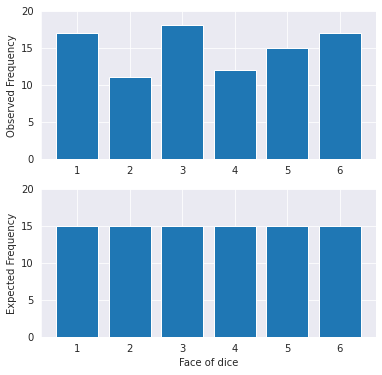

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (6,6))

# plot observed frequency
plt.subplot(211)
plt.bar(dice['face'], dice['observed'])
plt.ylabel('Observed Frequency')
plt.ylim([0,20])

# plot expected frequency
plt.subplot(212)
plt.bar(dice['face'], dice['expected'])
plt.ylabel('Expected Frequency')
plt.xlabel('Face of dice')
plt.ylim([0,20])
plt.show()

Goodness-of-Fit test evaluates whether this variation is significantly acceptable. In other words, it tests how far the observed data fits to the expected distribution.

* If there is more deviation between the observed and expected frequencies, the value of Chi-Square will be more.
* If the observed frequencies match the expected frequencies exactly, its value will be zero. therefore, a value close to zero denotes more closeness in the fit.

Null Hypothesis (H$_0$): no significant difference between observation and expected values, True if p value > 0.05

Alternate Hypothesis (H$_1$): significant difference between observation and expected values, True if p value < 0.05

In [ ]:
stats.chisquare(dice['observed'], dice['expected'])

Power_divergenceResult(statistic=2.8, pvalue=0.7307864865887586)

* p = no. of parameters the distribution has. p=0 for uniform distribution, p=1 for poisson dist, p = 2 for normal dist

* degrees of freedom(dof) = no. of possible classes - p - 1

In [ ]:
# critical Chi-Square value
p = 0
DOF = len(dice['observed']) - p - 1
stats.chi2.ppf(0.95, DOF)

11.070497693516351

* If the calculated Chi-Square statistic >= to the critical value, the null hypothesis(H$_0$) should be rejected.

* Chi-Square statistic <= the critical value, the null hypothesis(H$_0$) should **not** be rejected.